# TITANIC DATASET SURVIVAL RATE

In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('whitegrid')

In [2]:
# import dataframe
df = pd.read_csv('titanic_train.csv')

In [3]:
# check the head
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Sibsp = Sibling/Spouse, Parch = Parent/Child

In [6]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


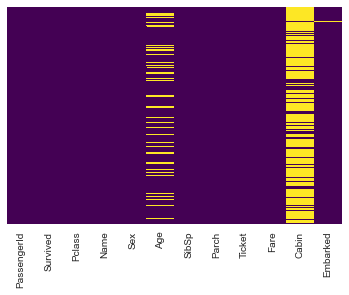

In [8]:
# see where data is missing
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

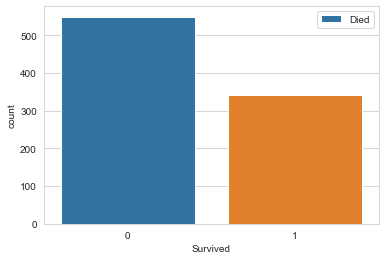

In [10]:
sns.countplot(x='Survived', data=df)
plt.legend(['Died', 'Survived'])

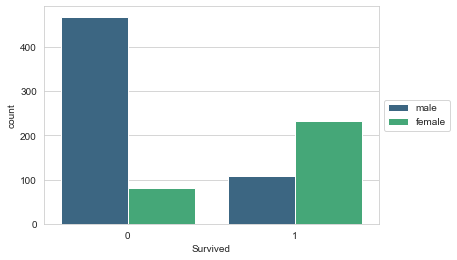

In [14]:
sns.countplot(x='Survived', hue='Sex', data=df, palette="viridis")
plt.legend(loc="center left", bbox_to_anchor=(1.0, 0.5))

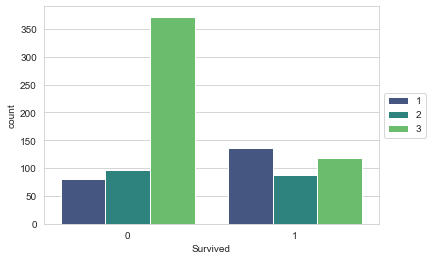

In [17]:
sns.countplot(x='Survived', hue='Pclass', data=df, palette="viridis")
plt.legend(loc="center left", bbox_to_anchor=(1.0, 0.5))

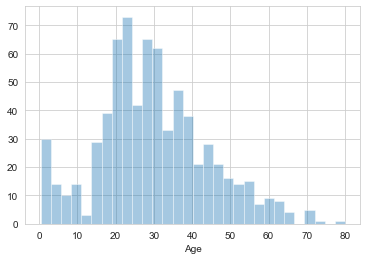

In [18]:
sns.distplot(df['Age'].dropna(), kde=False, bins=30)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


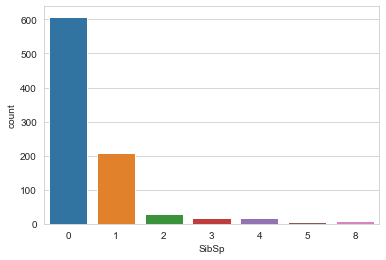

In [21]:
sns.countplot(x="SibSp", data=df)

In [22]:
df.Fare

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64

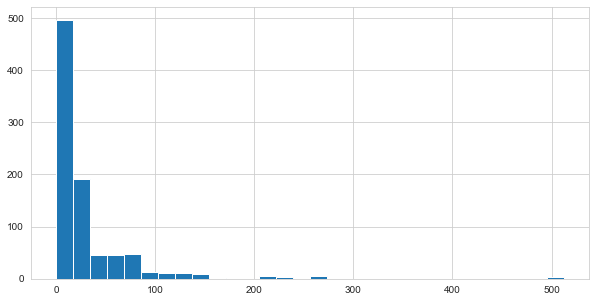

In [24]:
df.Fare.hist(bins=30, figsize=(10,5))

In [29]:
# with cufflinks
import cufflinks as cf
cf.go_offline()

df.Fare.iplot(kind='hist', bins=30, mode='overlay', title='Fare')

# CLEANING THE DATASET

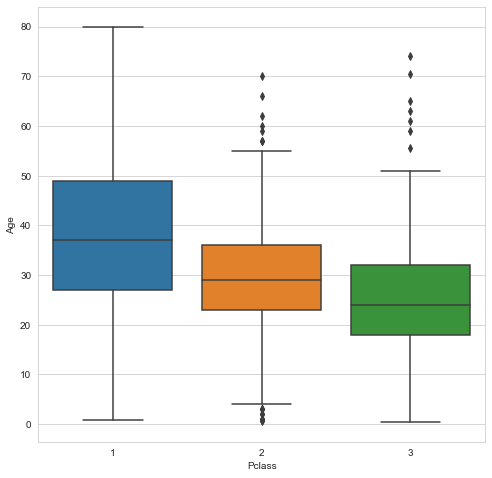

In [34]:
# imputation: filling missing values
plt.figure(figsize=(8, 8))
sns.boxplot(x='Pclass', y='Age', data=df)


In [39]:
def impute(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

# call and apply the function
df['Age'] = df[['Age', 'Pclass']].apply(impute, axis=1)

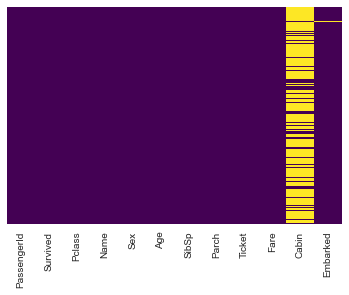

In [41]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [43]:
# there are so much missing values in the Cabin column, that is just easier to drop it
df.drop('Cabin', axis=1, inplace=True)

In [44]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


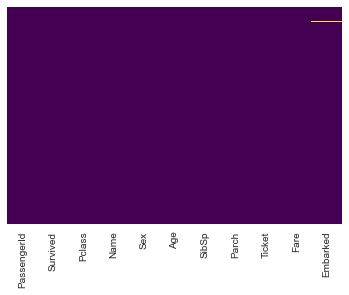

In [45]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis') # no more Cabin column

In [46]:
# drop all the other missing values
df.dropna(inplace=True)

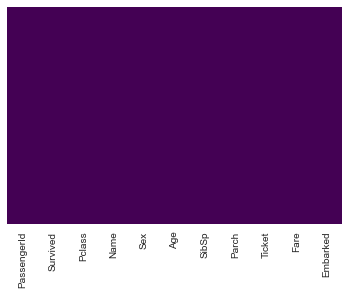

In [47]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [50]:
# deal with categorical features
sex = pd.get_dummies(df['Sex'], drop_first=True)
sex

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [54]:
embark = pd.get_dummies(df['Embarked'], drop_first=True)
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [55]:
df = pd.concat([df, sex, embark], axis=1)

In [56]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [57]:
# drop the columns we aren't gonna use
df.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)

In [59]:
df.drop('PassengerId', axis=1, inplace=True)

In [60]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


# BUILDING THE LOGISTIC REGRESSION MODEL

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
x = df.drop('Survived', axis=1)
y = df['Survived']

In [63]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)
                                                        

In [64]:
from sklearn.linear_model import LogisticRegression

In [65]:
logmodel = LogisticRegression()

In [66]:
logmodel.fit(x_train, y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [67]:
predictions = logmodel.predict(x_test)

In [68]:
# evaluate the model
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions)) # pass the true values

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       163
           1       0.82      0.71      0.76       104

    accuracy                           0.83       267
   macro avg       0.83      0.81      0.81       267
weighted avg       0.83      0.83      0.83       267



In [69]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, predictions))

[[147  16]
 [ 30  74]]
